In [90]:
import pandas as pd

In [91]:
filename = "data/GaitMaturationDatabase.xlsx"
df = pd.read_excel(filename)

In [92]:
print(df.head())

   subject-id(1-50)  age-months gender  height-inches  weight-lbs  \
0                 1          40      M           40.5          43   
1                 2          45      F           40.0          35   
2                 3          47      F           39.5          35   
3                 4          48      M           40.0          37   
4                 5          49      M           39.0          36   

   leg-length-inches  Speed-m/sec  Group  
0               23.0      1.04289  Young  
1               20.0      1.05322  Young  
2               21.0      0.98953  Young  
3               20.0      1.01551  Young  
4               20.0      0.82461  Young  


# 1. How does weight vary between genders within the groups?

- **Graph Type:** Box Plot with grouping
- **Objective:** Investigate weight differences between genders and groups
- **Question Prompt:** Create a grouped box plot to compare the weight distribution of males and females in the groups

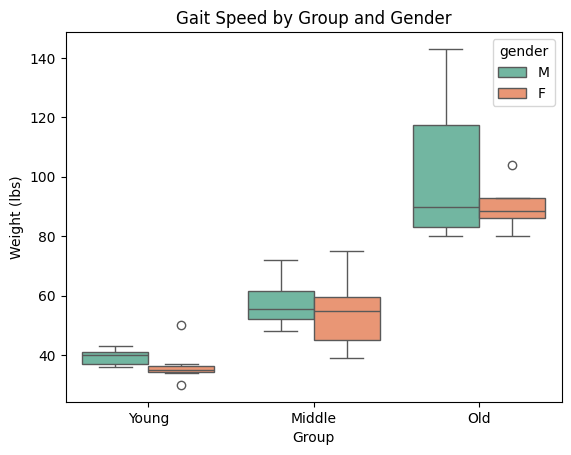

In [93]:
#code
import matplotlib.pyplot as plt
import seaborn as sns 

sns.boxplot(x="Group", y="weight-lbs", hue="gender", data=df, palette="Set2")
plt.title("Gait Speed by Group and Gender")
plt.xlabel("Group")
plt.ylabel("Weight (lbs)")
plt.show()

# 2. Is there a relationship between age and leg length, and does it differ by group?

- **Graph Type:** Regplot
- **Objective:** Examine if leg length increases consistently with age and whether this differs between the groups
- **Question Prompt:** Create a scatterplot with age on the x-axix and leg length on the y-axix. Add trend lines

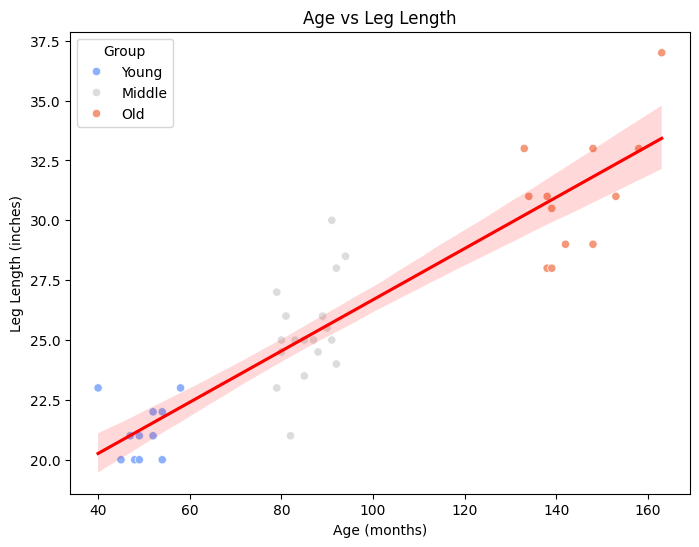

In [115]:

plt.figure(figsize=(8,6))

#Scatter plot
sns.scatterplot(
    x="age-months", 
    y="leg-length-inches", 
    hue="Group", 
    data=df, 
    palette="coolwarm", 

)
#regression plot
sns.regplot(
    x="age-months",
    y="leg-length-inches",
    data=df,
    scatter_kws={'alpha':0}, # this adjust the transparency of scatter points
    line_kws={'color':'red'} #customize the line color
)

plt.title("Age vs Leg Length")
plt.xlabel("Age (months)")
plt.ylabel("Leg Length (inches)")
plt.show()

# 3. Are older individuals more likely to have a wider range of gait speeds?

- **Graph Type:** Box Plot with swarm overlay
- **Objective:** Analyse whether the variability in gait speed is higher in the "Old" group than in the "Young" group
- **Question Prompt:** Create a box plot for gait speed for both groups and overlay individual data points using a swarm plot

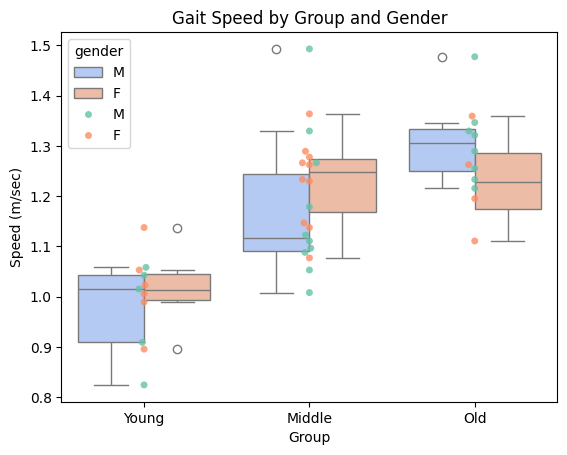

In [95]:
#box plot
sns.boxplot(x="Group", 
            y="Speed-m/sec",
            hue="gender" ,
            data=df,
            palette="coolwarm", 
           
            )

# Overlay individual data points using a swarm plot
sns.swarmplot(
    x="Group", 
    y="Speed-m/sec", 
    hue="gender", 
    data=df,
    palette="Set2", 
    alpha=0.8   
    
   
)
plt.title("Gait Speed by Group and Gender")
plt.xlabel("Group")
plt.ylabel("Speed (m/sec)")
plt.show()

# 4. Do younger individuals with higher leg lengths always have higher gait speeds?

- **Graph Type:** Heatmap of grouped data
- **Objective:** Analyse the interaction of leg lenghth and gait speed for younger individuals using a heatmap
- **Question Prompt:** Create a heatmap showing the average gait speed for "Young" individuals across bins of leg length and age 

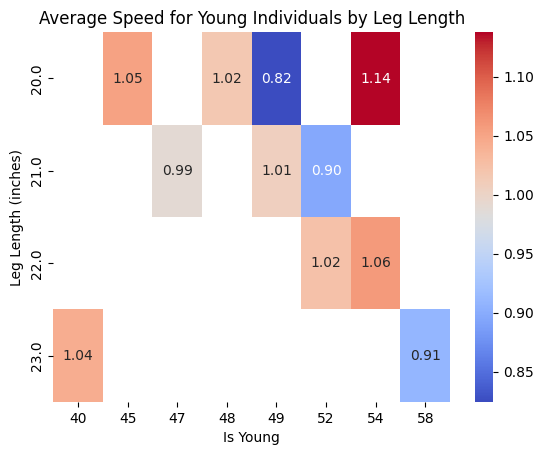

In [142]:

# Filter for young only
young_df = df[df['Group'] == 'Young']
avg_speed_for_young = young_df.groupby(["leg-length-inches","age-months"])["Speed-m/sec"].mean().unstack()
# there will be some holes in the heatmap do to the lack of data points
sns.heatmap(avg_speed_for_young,annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Average Speed for Young Individuals by Leg Length")
plt.xlabel("Is Young")
plt.ylabel("Leg Length (inches)")
plt.show()

# 5. Is leg length a good predictor of gait speed for each gender?

- **Graph Type:** Reg Plot
- **Objective:** Explore whether leg length can predict gait and how the relationship differs between genders
- **Question Prompt:** Create a Reg plot with leg length on the x-axis and gait speed on the y-axis. Add regression lines for males and femlaes. Does the predictive power of leg length vary by gender ?

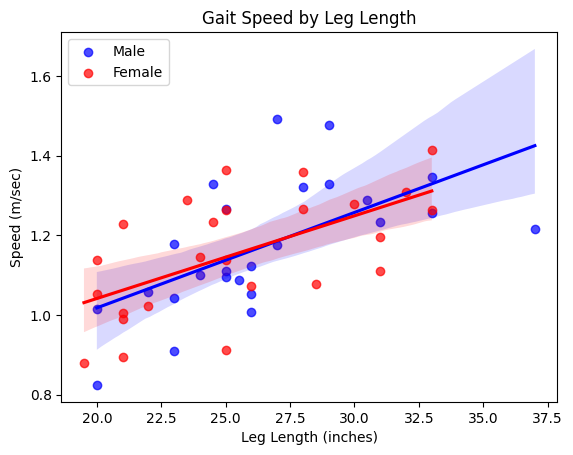

In [113]:
#regression plot males
sns.regplot(
    x="leg-length-inches",
    y="Speed-m/sec",
    data=df[df['gender'] == 'M'],
    scatter_kws={'alpha':0.7,'color':'blue'}, # this adjust the transparency of scatter points
    line_kws={'color':'blue'}, #customize the line color
    label="Male"

)
#regression plot females
sns.regplot(
    x="leg-length-inches",
    y="Speed-m/sec",
    data=df[df['gender'] == 'F'],
    scatter_kws={'alpha':0.7, 'color':'red'}, # this adjust the transparency of scatter points
    line_kws={'color':'red'}, #customize the line color
    label="Female"

)
plt.legend()
plt.title("Gait Speed by Leg Length")
plt.xlabel("Leg Length (inches)")
plt.ylabel("Speed (m/sec)")
plt.show()

# 6. How does height affect gait speed across different groups?

- **Graph Type:** Violin Plot
- **Objective:** Compare the distribution of gait speed for different height ranges across groups 
- **Question Prompt:** Create a violin plot for gait speed groupd by "Young", "Middle" and "Old" but split the violins into three categories: short, average, and tall (based on height). 

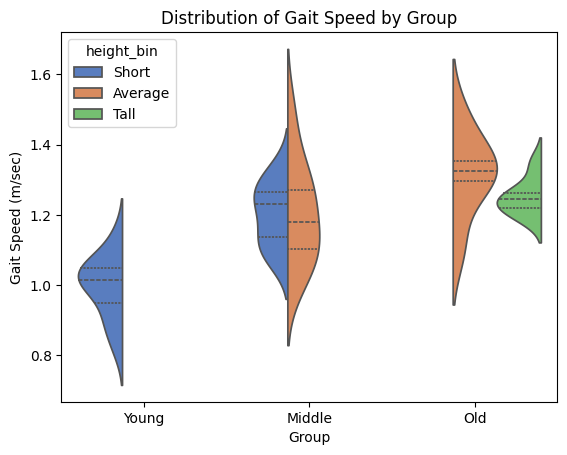

In [150]:
# create a high category column
# df['HeightCategory'] = pd.cut(df['height-inches'], bins=[0,60,69,72], labels=['Short', 'Average', 'Tall'], right=False)
df["height_bin"] = pd.cut(df['height-inches'], bins=3, labels=['Short', 'Average', 'Tall'], right=False)

sns.violinplot(
    x="Group",           
    y="Speed-m/sec",     
    hue="height_bin", 
    data=df,             
    split=True,          
    inner="quartile",       
    palette="muted",
    
)
plt.title("Distribution of Gait Speed by Group")
plt.ylabel("Gait Speed (m/sec)")
plt.xlabel("Group")
plt.show()